# I am currently enrolled in Autonomous Vehicle Project under Dr. Sharma T, as discussed with mam we don't have to submit Assignment-1
Name - Abhishek Panwar
Enrollment no. - 23119001 
Branch - PI-1

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from matplotlib.ticker import ScalarFormatter

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mountains-vs-beaches/mountains_vs_beaches_preferences.csv


In [41]:
df = pd.read_csv("/kaggle/input/mountains-vs-beaches/mountains_vs_beaches_preferences.csv")

In [42]:
pd.set_option('display.max_columns', None)
df.head(5)

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1,1
1,69,male,88740,master,1,swimming,4777,suburban,228,190,fall,0,1,0
2,46,female,46562,master,0,skiing,1469,urban,71,280,winter,0,0,1
3,32,non-binary,99044,high school,6,hiking,1482,rural,31,255,summer,1,0,1
4,60,female,106583,high school,5,sunbathing,516,suburban,23,151,winter,1,1,0


In [43]:
unique_counts = df.nunique()
print(unique_counts)

Age                          52
Gender                        3
Income                    40983
Education_Level               4
Travel_Frequency             10
Preferred_Activities          4
Vacation_Budget            4500
Location                      3
Proximity_to_Mountains      300
Proximity_to_Beaches        300
Favorite_Season               4
Pets                          2
Environmental_Concerns        2
Preference                    2
dtype: int64


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     52444 non-null  int64 
 1   Gender                  52444 non-null  object
 2   Income                  52444 non-null  int64 
 3   Education_Level         52444 non-null  object
 4   Travel_Frequency        52444 non-null  int64 
 5   Preferred_Activities    52444 non-null  object
 6   Vacation_Budget         52444 non-null  int64 
 7   Location                52444 non-null  object
 8   Proximity_to_Mountains  52444 non-null  int64 
 9   Proximity_to_Beaches    52444 non-null  int64 
 10  Favorite_Season         52444 non-null  object
 11  Pets                    52444 non-null  int64 
 12  Environmental_Concerns  52444 non-null  int64 
 13  Preference              52444 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 5.6+ MB


In [45]:
df.describe()

,Age,Income,Travel_Frequency,Vacation_Budget,Proximity_to_Mountains,Proximity_to_Beaches,Pets,Environmental_Concerns,Preference
count,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000
mean,43.507360,70017.271280,4.489265,2741.799062,149.943502,149.888452,0.500858,0.498436,0.250706
std,14.985597,28847.560428,2.876130,1296.922423,86.548644,86.469248,0.500004,0.500002,0.433423
min,18.000000,20001.000000,0.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,45048.250000,2.000000,1622.000000,75.000000,75.750000,0.000000,0.000000,0.000000
50%,43.000000,70167.000000,4.000000,2733.000000,150.000000,150.000000,1.000000,0.000000,0.000000
75%,56.000000,95108.500000,7.000000,3869.000000,225.000000,225.000000,1.000000,1.000000,1.000000
max,69.000000,119999.000000,9.000000,4999.000000,299.000000,299.000000,1.000000,1.000000,1.000000


In [46]:
df.isnull().sum()/len(df)

Age                       0.0
Gender                    0.0
Income                    0.0
Education_Level           0.0
Travel_Frequency          0.0
Preferred_Activities      0.0
Vacation_Budget           0.0
Location                  0.0
Proximity_to_Mountains    0.0
Proximity_to_Beaches      0.0
Favorite_Season           0.0
Pets                      0.0
Environmental_Concerns    0.0
Preference                0.0
dtype: float64

In [47]:
label_encoder_gender = LabelEncoder()
label_encoder_Education_Level = LabelEncoder()
label_encoder_Preferred_Activities = LabelEncoder()
label_encoder_Location = LabelEncoder()
label_encoder_Favorite_Season = LabelEncoder()

df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
df['Education_Level'] = label_encoder_Education_Level.fit_transform(df['Education_Level'])
df['Preferred_Activities'] = label_encoder_Preferred_Activities.fit_transform(df['Preferred_Activities'])
df['Location'] = label_encoder_Location.fit_transform(df['Location'])
df['Favorite_Season'] = label_encoder_Favorite_Season.fit_transform(df['Favorite_Season'])

In [48]:
df.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,1,71477,0,9,1,2477,2,175,267,2,0,1,1
1,69,1,88740,3,1,3,4777,1,228,190,0,0,1,0
2,46,0,46562,3,0,1,1469,2,71,280,3,0,0,1
3,32,2,99044,2,6,0,1482,0,31,255,2,1,0,1
4,60,0,106583,2,5,2,516,1,23,151,3,1,1,0


In [49]:
X = df.drop('Preference', axis = 1)
X = X.values
y = df['Preference']

In [50]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_standard = std_scaler.fit_transform(X)

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.3, random_state = 0)

# Implementing KNN model

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

k_list = list(range(1,10))
k_values = dict(n_neighbors = k_list)
grid = GridSearchCV(knn, k_values, cv = 2, scoring = 'accuracy', n_jobs = -1)
grid.fit(X_train, y_train)


grid.best_params_, grid.best_score_

({'n_neighbors': 9}, 0.9246799237265051)

0.939811872378289

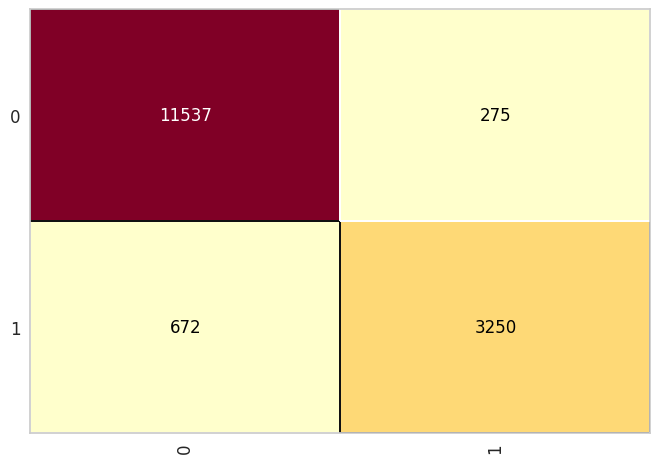

In [53]:
knn = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 1)
knn.fit(X_train, y_train)
previsoes = knn.predict(X_test)

accuracy = accuracy_score(y_test, previsoes)
confusion = confusion_matrix(y_test, previsoes)
classification_report_result = classification_report(y_test, previsoes)

cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

# Implementing SVM Classification model

In [58]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM model
svm_model = SVC()

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9868437778060252
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11812
           1       0.98      0.97      0.97      3922

    accuracy                           0.99     15734
   macro avg       0.98      0.98      0.98     15734
weighted avg       0.99      0.99      0.99     15734



0.9868437778060252

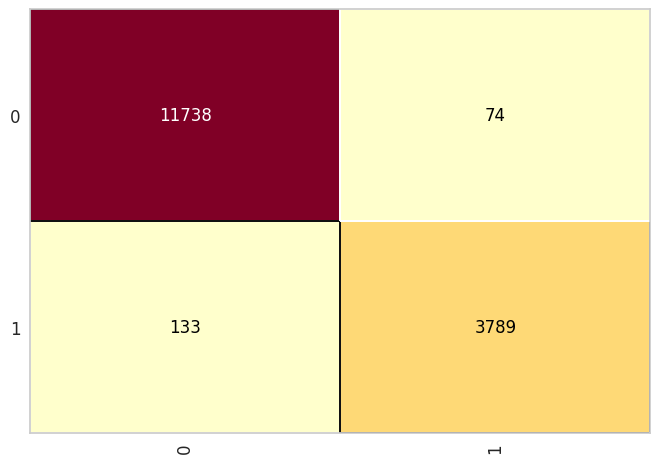

In [59]:
cm_svm = ConfusionMatrix(svm_model)
cm_svm.fit(X_train, y_train)
cm_svm.score(X_test, y_test)